In [21]:
import clemnet
from pathlib import Path
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
from matplotlib.image import imread
from tifffile import imsave

In [22]:
def mean_std_for_plot(image, i):
    global mean
    global std
    global mean_plot
    global std_plot
    
    mean = (mean + image.mean())
    mean_plot.append(mean/(i+1))

    std = (std + image.std())
    std_plot.append(std/(i+1))

def mean_std_adjustments(m0, s0, m1, s1, image):
    std_factor = s1/s0
    mean_adjustment = m1-m0
    image = image+mean_adjustment
    image = tf.image.adjust_contrast(image[:,:,np.newaxis], std_factor)
    image = image.numpy()[:,:,0]
    return image



/home/rlane/FMML_DATA/20211206_RP_OTO/lil_EM_montaged


Moving Mean: 0.3462203359629689 Moving Std: 0.12717707069039821
Average Mean: 0.3421039657086327 Average Std: 0.1209882106610087


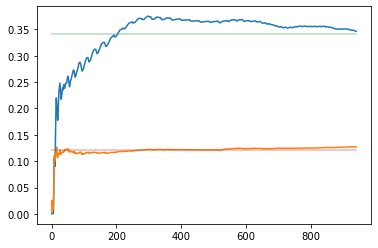

In [23]:
# Choose dataset
# path = '/home/rlane/FMML_DATA/20200618_RL012/2us/lil_EM_2us_montaged/'
# path = '/home/mabels/CLEMnet/data/RL012_blurred'
# path = '/home/rlane/FMML_DATA/20210224_FAST-EM_prototype'
path = '/home/rlane/FMML_DATA/20211206_RP_OTO/lil_EM_montaged'
# path = '/home/mabels/CLEMnet/data/RL012_mean_std_adjusted/'

fps_src = list(Path(path).glob('*/*_*_*.png'))
df = clemnet.get_DataFrame(fps_src)

# Filter sections
# df = df.loc[df['z'] != 1]

# Filter out outermost rows and columns
b = 0
df_fps_RL012 = pd.DataFrame()

# Must be done per section
for z, grp in df.groupby('z'):
    df_fps_RL012 = df_fps_RL012.append(grp.loc[(grp['x'] > grp['x'].min()+b) &\
                                               (grp['y'] > grp['y'].min()+b) &\
                                               (grp['x'] < grp['x'].max()-b) &\
                                               (grp['y'] < grp['y'].max()-b)])
df_fps = df.source
df_fps = df_fps_RL012.source.reset_index(drop=True)

mean = 0
std = 0

image_adjusted = []
mean_plot = []
std_plot = []
min_image = []

mean_begin = 0.45819 
mean_end = 0
std_begin = 0.2796
std_end = 1

m_s_adj = False
save = False
plot = True

if m_s_adj:
    for z, df_z in df.groupby('z'):
        df_z = df_z.source.reset_index(drop=True)

        for i in range(len(df_z)):
            image = imread(df_z[i])
            image = mean_std_adjustments(mean_begin, std_begin, mean_end, std_end, image)
            image_adjusted.append(image)
            min_image.append(image.min()) 
    min_image = abs(min(min_image))


image_adjusted_2 = []

if m_s_adj:
    for z, df_z in df.groupby('z'):
        df_z = df_z.source.reset_index(drop=True)       
     
        for i in range(len(df_z)):
            image = image_adjusted[i]
            image = (image/min_image+1)/(min_image+1)*255
            image_adjusted_2.append(image)
            
            if save:
                name = df_z[i].replace(path,"",1)[2:-4]
                name = "/home/mabels/CLEMnet/data/adj_RL012_ms/"+ str(z) +"/" + name + ".png"
                io.imsave(name, image)
                print(name)
                print('saved:', i, 'from', z)
    x_axis = len(df)
else:
    x_axis = len(df_fps)
    
if plot:   
    for i in range(x_axis):
        if m_s_adj:
            image = image_adjusted_2[i]
            
        else:   
            image = cv2.imread(df_fps[i], -1)/255
            
        mean_std_for_plot(image, i)

plt.plot(mean_plot)
# plt.plot(np.zeros(len(mean_plot)))
plt.plot(std_plot)
# plt.plot(np.ones(len(std_plot)))
plt.plot((sum(mean_plot)/len(mean_plot))*np.ones(len(mean_plot)), alpha=0.35)
plt.plot((sum(std_plot)/len(std_plot))*np.ones(len(std_plot)), alpha=0.35)
# plt.ylim(0.2, 0.5)

print()
print()
print(path)
print()
if m_s_adj:
    print('Mean & std adjusted:', mean_begin, 'to', mean_end, 'and', std_begin, 'to', std_end)
print()
print('Moving Mean:', mean_plot[-1], 'Moving Std:', std_plot[-1])
print('Average Mean:', sum(mean_plot)/len(mean_plot), 'Average Std:', sum(std_plot)/len(std_plot))


In [5]:
print(image)